<a href="https://colab.research.google.com/github/sh-shmss/from_scratch/blob/master/ml_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.animation as animation
from IPython.display import HTML

# Linear Regression

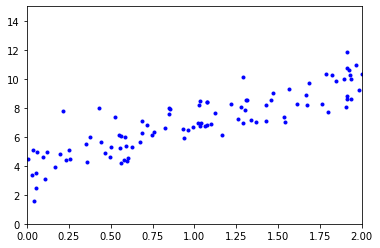

In [32]:
# Generate random linear data.

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [0]:
# Train the linear regressor.

thetas = []
errors = []
m = X.shape[0]
n = y.shape[1]
lr = 1e-1
steps = 35
batch_size = 50

theta = np.random.rand(2,n)
X_b_main = np.c_[np.ones((m,1)), X]

for i in range(steps):

  seed = random.sample(range(0, m-1), batch_size)
  y_batch = y[seed]
  X_b = X_b_main[seed]

  grads = 2/m * X_b.T.dot(X_b.dot(theta)-y_batch)
  error = (X_b.dot(theta)-y_batch) ** 2
  error = error.mean()
  errors.append(error)
  thetas.append(theta)
  theta = theta - lr * grads

In [34]:
# test the model

X_new = np.array([[0], [2]])
# X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new * theta[1] + theta[0] # X_new_b.dot(theta) 
plt.plot(X_new, y_predict, 'r-')
plt.plot(X,y, 'b.')
plt.show()

In [35]:
# animate training process

fig, ax = plt.subplots()

# X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]

line, = ax.plot(X_new, X_new_b.dot(thetas[0]), '-r')
# line, = ax.plot(X_new, X_new * thetas[i][1] + thetas[i][0], '-r')
text = ax.text(0.5, 0.1, "", bbox={'facecolor':'green', 'alpha':0.4, 'pad':5},
                transform=ax.transAxes)
plt.plot(X, y, "b.")


def animate(i):
    error = errors[i]
    text.set_text(f'MSE: {error}')
    y_predict = X_new_b.dot(thetas[i]) 
    # y_predict = X_new * thetas[i][1] + thetas[i][0] # X_new_b.dot(thetas[i]) 
    line.set_data(X_new, y_predict)
    return line,


ani = animation.FuncAnimation(
    fig, animate, interval=100, save_count=steps)

plt.close()
HTML(ani.to_jshtml())

In [0]:
HTML(ani.to_html5_video())

In [36]:
# Find and compare a baseline model.

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.00586099]), array([[2.98321346]]))

In [37]:
thetas[-1]

array([[3.54216129],
       [3.38803901]])

# Logistic Regression

In [0]:
# Define the data (Iris).

iris = datasets.load_iris()
X = iris.data[:,0:1]
y = iris.target
idx = [np.c_[np.where(y==0), np.where(y==2)]] # Keep only class 0 and 2 (binary classification)
X = X[tuple(idx)]
X = X.reshape (100,-1)
y = y[tuple(idx)]
y = np.where(y==2, 1, y) # Make classification easier by having 0 and 1 instead of 0 and 2 
y = y.reshape (100,-1)

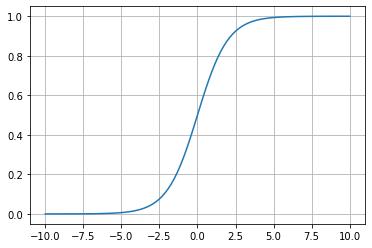

In [39]:
# Define and test the sigmoid function.

epsilon = 1e-7

def sigmoid(t):
  return 1/(1+(np.exp(-1*t)) + epsilon)

X_sig = np.linspace(-10, 10, 100)
y_sig = sigmoid(X_sig)
plt.plot(X_sig, y_sig)
plt.grid(True)
plt.show()

In [0]:
# Train the logistic regression model.

thetas = []
errors = []
m = X.shape[0]
n = y.shape[1]
lr = 1e-1
steps = 7000
batch_size = 99

theta = np.random.rand(2,n)
X_b_full = np.c_[np.ones((m,1)), X]


for i in range(steps):
  seed = random.sample(range(0, m-1), batch_size)
  y_batch = y[seed]
  X_b = X_b_full[seed]

  grads = 1/m * (X_b.T.dot(sigmoid(X_b.dot(theta))-y_batch))
  error = -1 * 1/m * (y_batch * np.log(sigmoid(X_b.dot(theta))) + (1-y_batch) * np.log(1 - sigmoid(X_b.dot(theta))))
  error = error.mean()
  errors.append(error)
  thetas.append(theta)
  theta = theta - lr * grads
  # print(error)

In [41]:
# Find a baseline model.
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)
log_reg.coef_, log_reg.intercept_

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([[3.44620603]]), array([-19.64306761]))

In [42]:
thetas[-1]

array([[-15.39404175],
       [  2.7027045 ]])

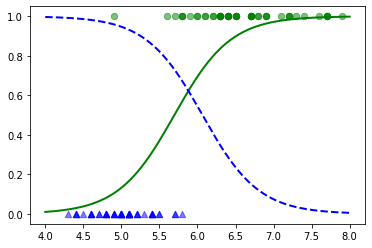

In [43]:
# Plot the decision boundaries.
X_new = np.linspace(4, 8, 1000).reshape(-1, 1)
y_proba0 = sigmoid(X_new * thetas[-1][1][0] + thetas[-1][0][0])
y_proba1 = sigmoid(1 - (X_new * thetas[-1][1][0] + thetas[-1][0][0]))

id = 50

plt.scatter(X[:id],y[:id], alpha= 0.5, color = 'blue', marker = '^', s = 40)
plt.scatter(X[id:],y[id:], alpha= 0.5, color = 'green', marker = 'o', s = 40)
plt.plot(X_new, y_proba0, "g-", linewidth=2)
plt.plot(X_new, y_proba1, "b--", linewidth=2)
plt.show()

In [44]:
# Animate the training process.

fig, ax = plt.subplots()

X_new = np.linspace(4, 8, 1000).reshape(-1, 1)
y_proba0 = sigmoid(X_new * thetas[-1][1][0] + thetas[-1][0][0])
y_proba1 = sigmoid(1 - (X_new * thetas[-1][1][0] + thetas[-1][0][0]))


line, = ax.plot(X_new, y_proba0, "g-", linewidth=2)
line1, = ax.plot(X_new, y_proba1, "b-", linewidth=2)

ax.scatter(X[:id],y[:id], alpha= 0.5, color = 'blue', marker = '^', s = 40)
ax.scatter(X[id:],y[id:], alpha= 0.5, color = 'green', marker = 'o', s = 40)
text = ax.text(0.4, 0.1, "", bbox={'facecolor':'green', 'alpha':0.4, 'pad':5},
                transform=ax.transAxes)


def animate(i):
    l = round (i * 70)
    error = errors[l]
    text.set_text(f'Log Error: {error}')
    y_proba0 = sigmoid(X_new * thetas[l][1][0] + thetas[l][0][0])
    y_proba1 = sigmoid(1 - (X_new * thetas[l][1][0] + thetas[l][0][0]))
    line1.set_data(X_new, y_proba1)
    line.set_data(X_new, y_proba0)
    return line,


ani = animation.FuncAnimation(
    fig, animate, interval=120, save_count=100)

plt.close()
HTML(ani.to_jshtml())

In [0]:
HTML(ani.to_html5_video())

# Softmax Regression

In [0]:
# Define the data (Iris).

iris = datasets.load_iris()
X = iris.data[:,(2,3)]
y = iris.target
y = y.reshape (150,-1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X = X_train
y = y_train

In [0]:
# Define the softmax function
epsilon = 1e-7

def softmax (k):
  return np.exp(k)/np.sum(np.exp(k), axis =1, keepdims=True)

# Define onehot encoder
def one_hot(y):
  n_classes = len(np.unique(y))
  m = len(y)
  one_hot_vectors = np.zeros((m, n_classes))
  for i in range(m):
    one_hot_vectors[i][y[i]] = 1 
  return one_hot_vectors

In [0]:
y_one_hot = one_hot(y)

# Train the softmax regression model.

thetas = []
errors = []
m = X.shape[0]
n = X.shape[1]
no_classes = len(np.unique(y))
lr = 1e-1
steps = 1000
batch_size = 99

theta = np.random.rand(n+1, no_classes)
X_b_full = np.c_[np.ones((m,1)), X]

for i in range(steps):
  seed = random.sample(range(0, m-1), batch_size)
  y_batch = y_one_hot[seed]
  X_b = X_b_full[seed]
  grads = 1/m * X_b.T.dot(softmax(X_b.dot(theta)) - y_batch)
  error = -1/m * (y_batch * np.log(softmax(X_b.dot(theta))))
  error = error.mean()
  errors.append(error)
  thetas.append(theta)
  theta = theta - lr * grads

In [16]:
X_test_full = np.c_[np.ones((len(X_test),1)), X_test]
y_proba = softmax(X_test_full.dot(theta))
y_pred = np.argmax(y_proba, axis=1)
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])

In [6]:
# Find a baseline model.
from sklearn.linear_model import LogisticRegression
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)
y_pred = softmax_reg.predict(X_test)
confusion_matrix(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [17]:
X = iris["data"][:, (2, 3)]
y = iris["target"]

x0, x1 = np.meshgrid(
        np.linspace(0, 7, 1000).reshape(-1, 1),
        np.linspace(0, 3, 1000).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_b = np.c_[np.ones([len(X_new), 1]), X_new]
y_proba = softmax(X_new_b.dot(theta))
y_predict = np.argmax(y_proba, axis=1)
zz = y_predict.reshape(x0.shape)

plt.plot(X[y==2, 0], X[y==2, 1], "co")
plt.plot(X[y==1, 0], X[y==1, 1], "mo")
plt.plot(X[y==0, 0], X[y==0, 1], "ro")

plt.contourf(x0, x1, zz, cmap='Pastel1')
plt.show()

In [26]:
# Animate the training process.

X = iris["data"][:, (2, 3)]
y = iris["target"]

fig, ax = plt.subplots()

x0, x1 = np.meshgrid(
        np.linspace(0, 7, 1000).reshape(-1, 1),
        np.linspace(0, 3, 1000).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_b = np.c_[np.ones([len(X_new), 1]), X_new]
y_proba = softmax(X_new_b.dot(theta))
y_predict = np.argmax(y_proba, axis=1)
zz = y_predict.reshape(x0.shape)

ax.plot(X[y==2, 0], X[y==2, 1], "co")
ax.plot(X[y==1, 0], X[y==1, 1], "mo")
ax.plot(X[y==0, 0], X[y==0, 1], "ro")


text = ax.text(0.4, 0.1, "", bbox={'facecolor':'green', 'alpha':0.4, 'pad':5},
                transform=ax.transAxes)

line = ax.contourf(x0, x1, zz, cmap='Pastel1')



def animate(i):
    l = round (i * 10)
    error = errors[l]
    text.set_text(f'Cross Entropy: {error}')
    theta = thetas[l]
    y_proba = softmax(X_new_b.dot(theta))
    y_predict = np.argmax(y_proba, axis=1)
    zz = y_predict.reshape(x0.shape)
    ax.contourf(x0, x1, zz, cmap='Pastel1')


ani = animation.FuncAnimation(
    fig, animate, interval=120, save_count=90)

plt.close()
HTML(ani.to_jshtml())

In [29]:
HTML(ani.to_html5_video())